In [1]:
import pandas as pd
import numpy as np
import os
import zipfile
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
path_zipped = "/home/chinmay/Documents/UTHealth/Others/bmi_6002/pixels"

In [3]:
# for foldername_zip in tqdm(os.listdir(path_zipped)):
#     try:
#         with zipfile.ZipFile(os.path.join(path_zipped, foldername_zip), "r") as folder_zip:
#             folder_zip.extractall(os.path.join(path_zipped, foldername_zip.split(".")[0]))
#     except:
#         pass

  0%|          | 0/47 [00:00<?, ?it/s]

In [4]:
list_extracted_folders = [ folder for folder in os.listdir(path_zipped) if "." not in folder]
list_rows = []

for extracted_folder in tqdm(list_extracted_folders, desc="Folder"):
    folder = os.path.join(path_zipped, extracted_folder, "pixels")
    for csv_filename in os.listdir(folder):
        df = pd.read_csv(os.path.join(folder, csv_filename))
        if(df.empty):
            vessel_density = 0
        else:
            vessel_density = df["Red"].mean()
        list_rows.append([csv_filename, vessel_density])

df_vessel_density = pd.DataFrame(list_rows, columns=["filename", "vessel_density"])

Folder:   0%|          | 0/47 [00:00<?, ?it/s]

,filename,vessel_density
0,Angio Retina_OD-Superficial_sub-000032.png_IT.csv,61.854353
1,Angio Retina_OD-Superficial_sub-000032.png_IN.csv,62.046104
2,Angio Retina_OD-Superficial_sub-000032.png_IS.csv,70.803677
3,Angio Retina_OS-Superficial_sub-000032.png_IS.csv,64.074333
4,Angio Retina_OD-Deep_sub-000032.png_II.csv,91.834667


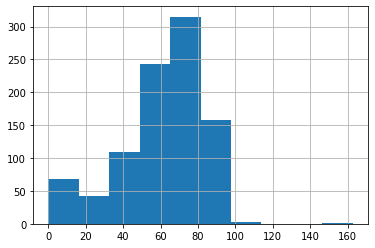

In [5]:
# df = df[["Red", "Green", "Blue"]]
# df.to_numpy().shape
df_vessel_density["vessel_density"].hist()
df_vessel_density.head()

In [6]:
df_vessel_density.to_csv("vessel_density.csv", index=False)